In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [49]:
#As the date is of object type we need to cnvert it to datetime format hence will reading the data:
abc=pd.read_csv("C:\\Users\\Shruti Udagire\\EDA\\Files\\data.csv", parse_dates=['date'])
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 43.2+ MB


In [50]:
abc['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [51]:
#as there are alot of duplicate types
#cleaning type column and should have only four columns Industrial,Residential,Sensitive and RIRUO
#Updating the changes to abc data frame
abc.loc[(abc['type']=="Residential, Rural and other Areas"),'type']='Residential'
abc.loc[(abc['type']=="Residential and others"),'type']='Residential'
abc.loc[(abc['type']=="Industrial Area"),'type']='Industrial'
abc.loc[(abc['type']=="Industrial Areas"),'type']='Industrial'
abc.loc[(abc['type']=="Sensitive Area"),'type']='Sensitive'
abc.loc[(abc['type']=="Sensitive Areas"),'type']='Sensitive'
abc['type'].value_counts()

Residential    265963
Industrial     148071
Sensitive       15011
RIRUO            1304
Name: type, dtype: int64

# Showing Spm and Rspm level state wise

In [52]:
#Filling missing values for rspm and spm hence grouping by location and type
grp_location=abc.groupby(['location','type'])
dict_grp_location=dict(list(grp_location))
dict_grp_location

{('ANKLESHWAR', 'RIRUO'):        stn_code sampling_date    state    location  \
 101541     SAMP    06-01-2015  Gujarat  ANKLESHWAR   
 101542     SAMP    09-01-2015  Gujarat  ANKLESHWAR   
 101543     SAMP    13-01-2015  Gujarat  ANKLESHWAR   
 101544     SAMP    16-01-2015  Gujarat  ANKLESHWAR   
 101545     SAMP    20-01-2015  Gujarat  ANKLESHWAR   
 ...         ...           ...      ...         ...   
 101703     SAMP    16-11-2015  Gujarat  ANKLESHWAR   
 101704     SAMP    19-11-2015  Gujarat  ANKLESHWAR   
 101705     SAMP    23-11-2015  Gujarat  ANKLESHWAR   
 101706     SAMP    26-11-2015  Gujarat  ANKLESHWAR   
 101707     SAMP    30-11-2015  Gujarat  ANKLESHWAR   
 
                                        agency   type   so2   no2  rspm  spm  \
 101541  Gujarat State Pollution Control Board  RIRUO  13.0  20.0  91.0  NaN   
 101542  Gujarat State Pollution Control Board  RIRUO  14.0  21.0  78.0  NaN   
 101543  Gujarat State Pollution Control Board  RIRUO  12.0  19.0  85.0  

In [6]:
print(abc['rspm'].isnull().sum())
print(abc['spm'].isnull().sum())

40222
237387


In [7]:
#Forward filling
grouped_location=pd.DataFrame()
for key in dict_grp_location:
    df1=dict_grp_location[key].sort_values(by='date')
    df1['rspm'].fillna(method='ffill',inplace=True)
    df1['spm'].fillna(method='ffill',inplace=True)
    grouped_location=pd.concat([grouped_location,df1])

In [8]:
print(grouped_location['rspm'].isnull().sum())
print(grouped_location['spm'].isnull().sum())


23916
49742


In [9]:
#Initially we have grouped by 'location' and 'type' and then did foward fill but some values were not filled hence backward fill
backwardfill=grouped_location.groupby(['location','type'])
backwardfill=dict(list(backwardfill))
backwardfill
grouped_location=pd.DataFrame()
for key in backwardfill:
    df2=backwardfill[key].sort_values(by='date')
    df2['rspm'].fillna(method='bfill',inplace=True)
    df2['spm'].fillna(method='bfill',inplace=True)
    grouped_location=pd.concat([grouped_location,df2])

In [10]:
print(grouped_location['rspm'].isnull().sum())
print(grouped_location['spm'].isnull().sum())

4102
47909


In [11]:
#now we are grouping it on larger scale that is 'state' and thn by 'type' so as to fill null values
dict_grouped_state=dict(list(grouped_location.groupby(['state','type'])))
dict_grouped_state

{('Andhra Pradesh',
  'Industrial'):       stn_code       sampling_date           state      location  \
 1          151  February - M021990  Andhra Pradesh     Hyderabad   
 4          151     March - M031990  Andhra Pradesh     Hyderabad   
 7          151     April - M041990  Andhra Pradesh     Hyderabad   
 9          151       May - M051990  Andhra Pradesh     Hyderabad   
 12         151      June - M061990  Andhra Pradesh     Hyderabad   
 ...        ...                 ...             ...           ...   
 26158      752          13-12-2015  Andhra Pradesh  Vizianagaram   
 26159      752          16-12-2015  Andhra Pradesh  Vizianagaram   
 26160      752          19-12-2015  Andhra Pradesh  Vizianagaram   
 26161      752          22-12-2015  Andhra Pradesh  Vizianagaram   
 26162      752          25-12-2015  Andhra Pradesh  Vizianagaram   
 
                                              agency        type  so2   no2  \
 1                                               NaN  I

In [12]:
grouped_state=pd.DataFrame()
for key in dict_grouped_state:
    df3=dict_grouped_state[key]
    df3['rspm'].fillna(df3['rspm'].median(),inplace=True)
    df3['spm'].fillna(df3['spm'].median(),inplace=True)
    grouped_state=pd.concat([grouped_state,df3])

In [13]:
print(grouped_state['spm'].isnull().sum())
print(grouped_state['rspm'].isnull().sum())

1972
182


In [14]:
#Now we are grouping by 'type' and replacimg all remaining nan values
grouped_type=grouped_state.groupby('type').median()
grouped_type

,so2,no2,rspm,spm,pm2_5
type,,,,,
Industrial,10.0,25.00,103.0,229.33,35.0
RIRUO,13.0,24.00,91.0,NaN,33.0
Residential,7.0,20.50,86.0,197.00,31.0
Sensitive,4.6,16.65,64.0,193.00,NaN


In [15]:
dataframe=grouped_state

In [16]:
dataframe.loc[(dataframe['type']=='Industrial') & (dataframe['rspm'].isnull()),'rspm']=grouped_type['rspm']['Industrial']
dataframe.loc[(dataframe['type']=='RIRUO') & (dataframe['rspm'].isnull()),'rspm']=grouped_type['rspm']['RIRUO']
dataframe.loc[(dataframe['type']=='Residential') & (dataframe['rspm'].isnull()),'rspm']=grouped_type['rspm']['Residential']
dataframe.loc[(dataframe['type']=='Sensitive') & (dataframe['rspm'].isnull()),'rspm']=grouped_type['rspm']['Sensitive']

dataframe.loc[(dataframe['type']=='Industrial') & (dataframe['spm'].isnull()),'spm']=grouped_type['spm']['Industrial']
dataframe.loc[(dataframe['type']=='RIRUO') & (dataframe['spm'].isnull()),'spm']=grouped_type['spm']['RIRUO']
dataframe.loc[(dataframe['type']=='Residential') & (dataframe['spm'].isnull()),'spm']=grouped_type['spm']['Residential']
dataframe.loc[(dataframe['type']=='Sensitive') & (dataframe['spm'].isnull()),'spm']=grouped_type['spm']['Sensitive']

In [17]:
print(dataframe['rspm'].isnull().sum())
print(dataframe['spm'].isnull().sum())

0
1304


In [18]:
#adding a new 'year' column from 'date' column
dataframe['year']=dataframe['date'].dt.year
print(dataframe['year'].isnull().sum())

4


In [19]:
#filling null values in year by either doing forward fill or backwadr fill
dataframe['year']=dataframe['year'].fillna(method='ffill')
print(dataframe['year'].isnull().sum())
dataframe['year']=dataframe['year'].astype(int)

0


In [20]:
#ploting states in descending order as per the level of spm
dataframe

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial,3.1,7.0,90.3,82.000000,NaN,NaN,1990-01-02,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,7.5,90.3,82.000000,NaN,NaN,1990-01-03,1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,8.7,90.3,82.000000,NaN,NaN,1990-01-04,1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.0,8.9,90.3,82.000000,NaN,NaN,1990-01-05,1990
12,151,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial,5.6,11.8,90.3,82.000000,NaN,NaN,1990-01-06,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434695,650,12-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,2.0,44.0,93.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-12,2015
434696,650,14-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,2.0,47.0,145.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-14,2015
434697,650,18-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,4.0,55.0,208.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-18,2015
434698,650,20-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,3.0,49.0,206.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-20,2015


In [21]:
state=dataframe.groupby('state').median()
state=state[['rspm','spm']]
state=state.sort_values(by='spm',ascending=False)

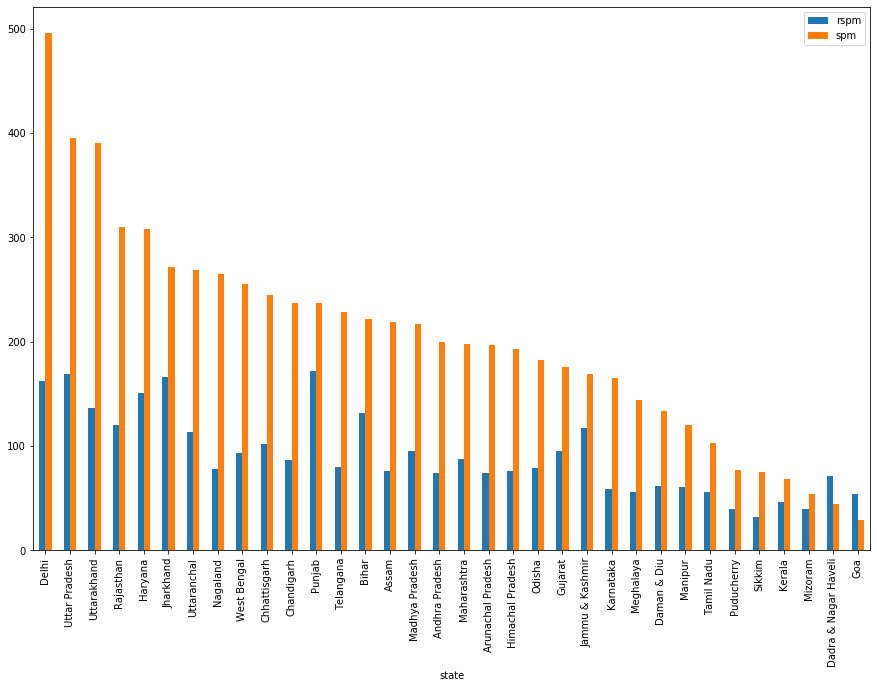

In [22]:
state.plot(kind='bar',figsize=(15,10))

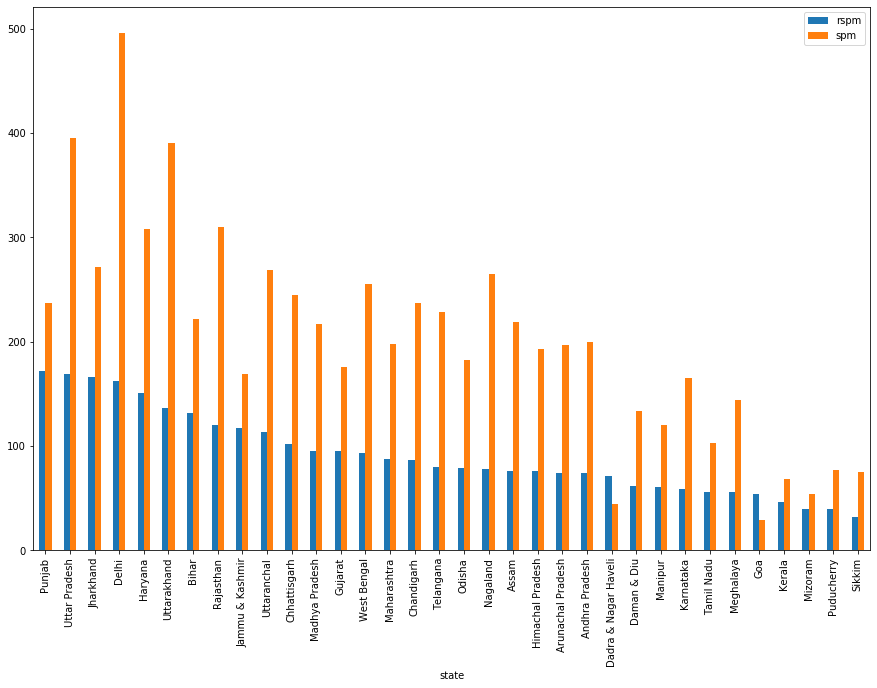

In [23]:
# potting a graph in  descending order as per the level of spm
state.sort_values(by='rspm',ascending=False).plot(kind='bar',figsize=(15,10))

# Looking at top 5 states with high spm values

In [24]:
states=state.reset_index().head(5)
top_five_states=states['state']
for i in top_five_states:
    print(i)

Delhi
Uttar Pradesh
Uttarakhand
Rajasthan
Haryana


In [25]:
group_by_state=dict(list(dataframe.groupby('state')))
plot_five_states=pd.DataFrame()
for i in top_five_states:
    df=group_by_state[i][['state','location','spm','rspm','type']]
    plot_five_states=pd.concat([plot_five_states,df])
plot_five_states

,state,location,spm,rspm,type
65865,Delhi,Delhi,506.0,101.0,Industrial
65866,Delhi,Delhi,371.0,101.0,Industrial
65863,Delhi,Delhi,487.0,101.0,Industrial
65864,Delhi,Delhi,528.0,101.0,Industrial
65869,Delhi,Delhi,372.0,101.0,Industrial
...,...,...,...,...,...
104854,Haryana,Hisar,152.0,0.0,Residential
104855,Haryana,Hisar,152.0,153.0,Residential
104856,Haryana,Hisar,152.0,109.0,Residential
104857,Haryana,Hisar,152.0,0.0,Residential


In [26]:
plot_five_states=plot_five_states.groupby(['state','location','type']).median()
plot_five_states

spm    rspm
state       location  type                        
Delhi       Delhi     Industrial   484.000  143.25
                      Residential  505.000  162.00
Haryana     Dharuhera Industrial   339.000  173.00
            Faridabad Industrial   378.000  180.00
                      Residential  370.000  163.00
...                                    ...     ...
Uttarakhand Haldwani  Residential  390.155  139.00
            Haridwar  Industrial   324.780  124.00
            Kashipur  Residential  390.155  152.50
            Rishikesh Residential  390.155  109.00
            Rudrapur  Industrial   324.780  135.00

[64 rows x 2 columns]

[(0, 600)]

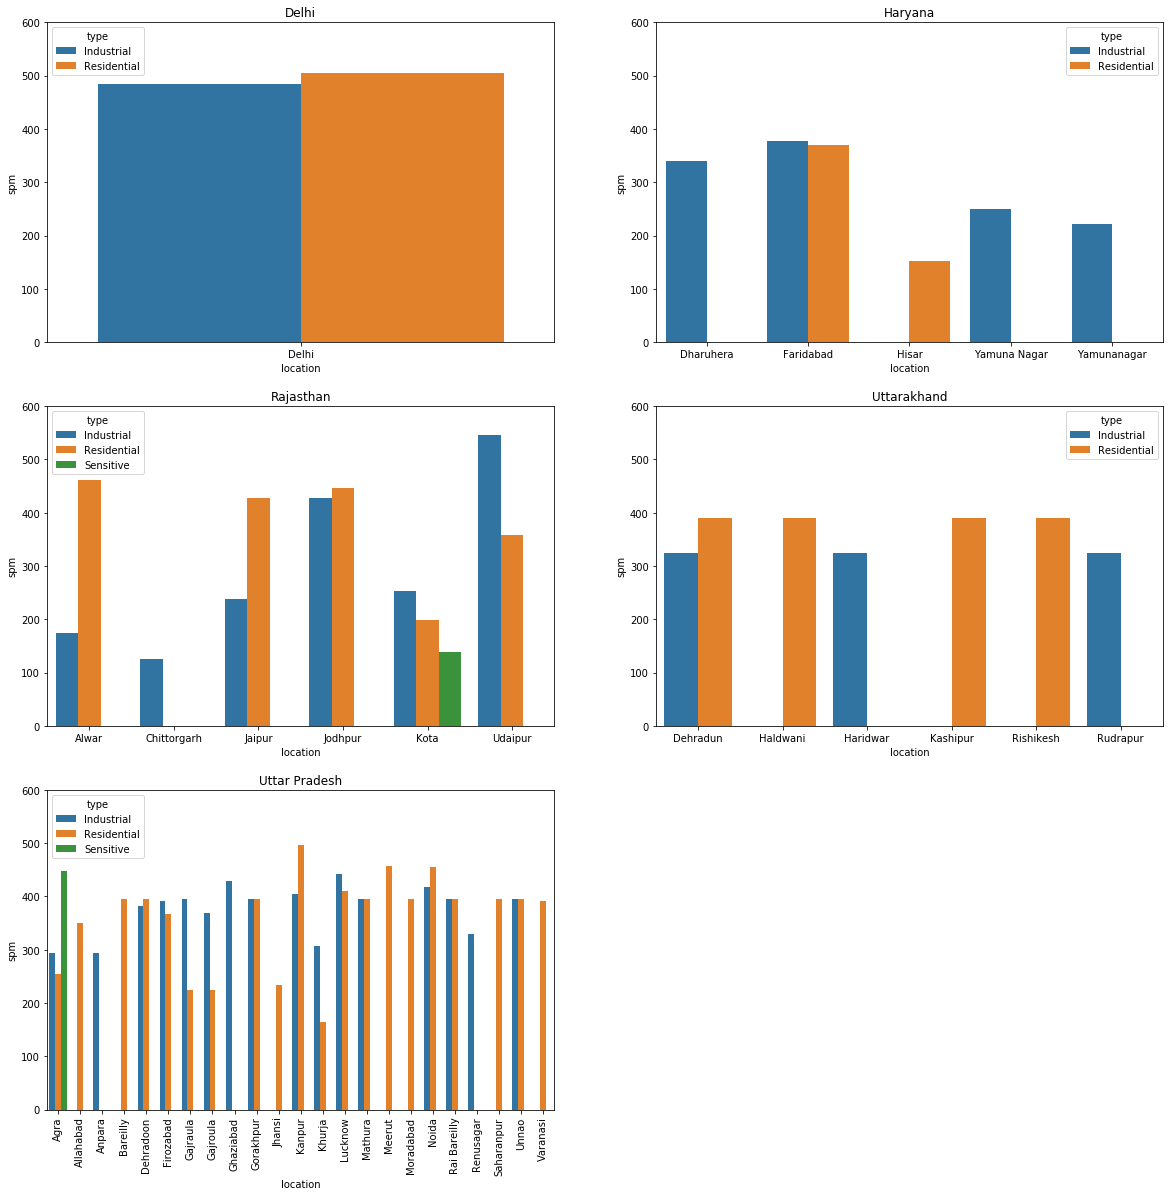

In [27]:
plt.figure(figsize = (20,20))
plt.subplot(3,2,1)
plt.title('Delhi')
a = sns.barplot(x = 'location',y = 'spm',hue = 'type',data = plot_five_states.loc['Delhi'].reset_index())
a.set(ylim = (0,600))
plt.subplot(3,2,2)
plt.title('Haryana')
b = sns.barplot(x = 'location',y = 'spm',hue = 'type',data = plot_five_states.loc['Haryana'].reset_index())
b.set(ylim = (0,600))
plt.subplot(3,2,3)
plt.title('Rajasthan')
c = sns.barplot(x = 'location',y = 'spm',hue = 'type',data = plot_five_states.loc['Rajasthan'].reset_index())
c.set(ylim = (0,600))
plt.subplot(3,2,4)
plt.title('Uttarakhand')
d = sns.barplot(x = 'location',y = 'spm',hue = 'type',data = plot_five_states.loc['Uttarakhand'].reset_index())
d.set(ylim = (0,600))
plt.subplot(3,2,5)
plt.title('Uttar Pradesh')
plt.xticks(rotation = 90)
g = sns.barplot(x = 'location',y = 'spm',hue = 'type',data = plot_five_states.loc['Uttar Pradesh'].reset_index())
g.set(ylim = (0,600))

The above graphs are of top 5 states showing the spm levels as per their locations.
In almost all the states, the residential locations are contributing to spm level same as that of industrial locations.
From the graph, its clear that in states like Delhi and Uttarakhand the spm level in residential areas is more 
than that of industrial areas which is quite surprising.

# Which years have not recorded the spm value 

In [29]:
states_year=dataframe.groupby(['state','year']).median()['spm']

In [30]:
states_year

state           year
Andhra Pradesh  1990    133.000000
                1991    141.500000
                1992    175.000000
                1993    192.000000
                1994    123.500000
                           ...    
West Bengal     2011    435.666667
                2012    469.666667
                2013    469.666667
                2014    469.666667
                2015    469.666667
Name: spm, Length: 626, dtype: float64

In [31]:
states_year=states_year.reset_index()
states_year['spm'].isnull().sum()

0

In [32]:
pivot=pd.pivot_table(states_year,values='spm',index='state',columns='year')
pivot.fillna(0,inplace= True)

In [33]:
pivot

year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
state,,,,,,,,,,,,,,,,,,,,,
Andhra Pradesh,0.0,0.0,0.0,133.0,141.5,175.0,192.0,123.5,134.0,125.5,...,191.0,183.0,189.0,195.0,216.000000,227.000000,227.000000,216.000000,200.000000,200.000000
Arunachal Pradesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,197.000000,197.000000
Assam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,124.5,108.0,131.0,124.0,219.000000,0.000000,219.000000,219.000000,219.000000,219.000000
Bihar,292.5,317.0,243.5,278.5,340.5,327.0,221.0,312.0,333.5,328.0,...,263.0,289.0,282.0,288.0,73.000000,73.000000,73.000000,0.000000,0.000000,0.000000
Chandigarh,0.0,0.0,180.5,210.5,253.0,341.0,350.5,165.0,168.0,149.0,...,206.0,205.0,186.0,154.5,140.000000,178.000000,374.000000,374.000000,374.000000,374.000000
Chhattisgarh,0.0,0.0,0.0,0.0,0.0,0.0,197.0,197.0,0.0,0.0,...,208.0,210.0,241.0,252.0,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
Dadra & Nagar Haveli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,222.0,181.5,280.0,42.000000,42.000000,42.000000,0.000000,0.000000,42.000000
Daman & Diu,0.0,0.0,74.0,83.5,92.0,104.0,99.5,115.0,100.0,0.0,...,0.0,219.0,204.5,224.0,200.000000,42.000000,46.000000,0.000000,0.000000,46.000000
Delhi,505.5,133.0,0.0,347.5,346.0,360.0,555.0,393.0,395.0,369.0,...,393.0,348.5,415.0,472.5,0.000000,647.000000,647.000000,647.000000,647.000000,647.000000


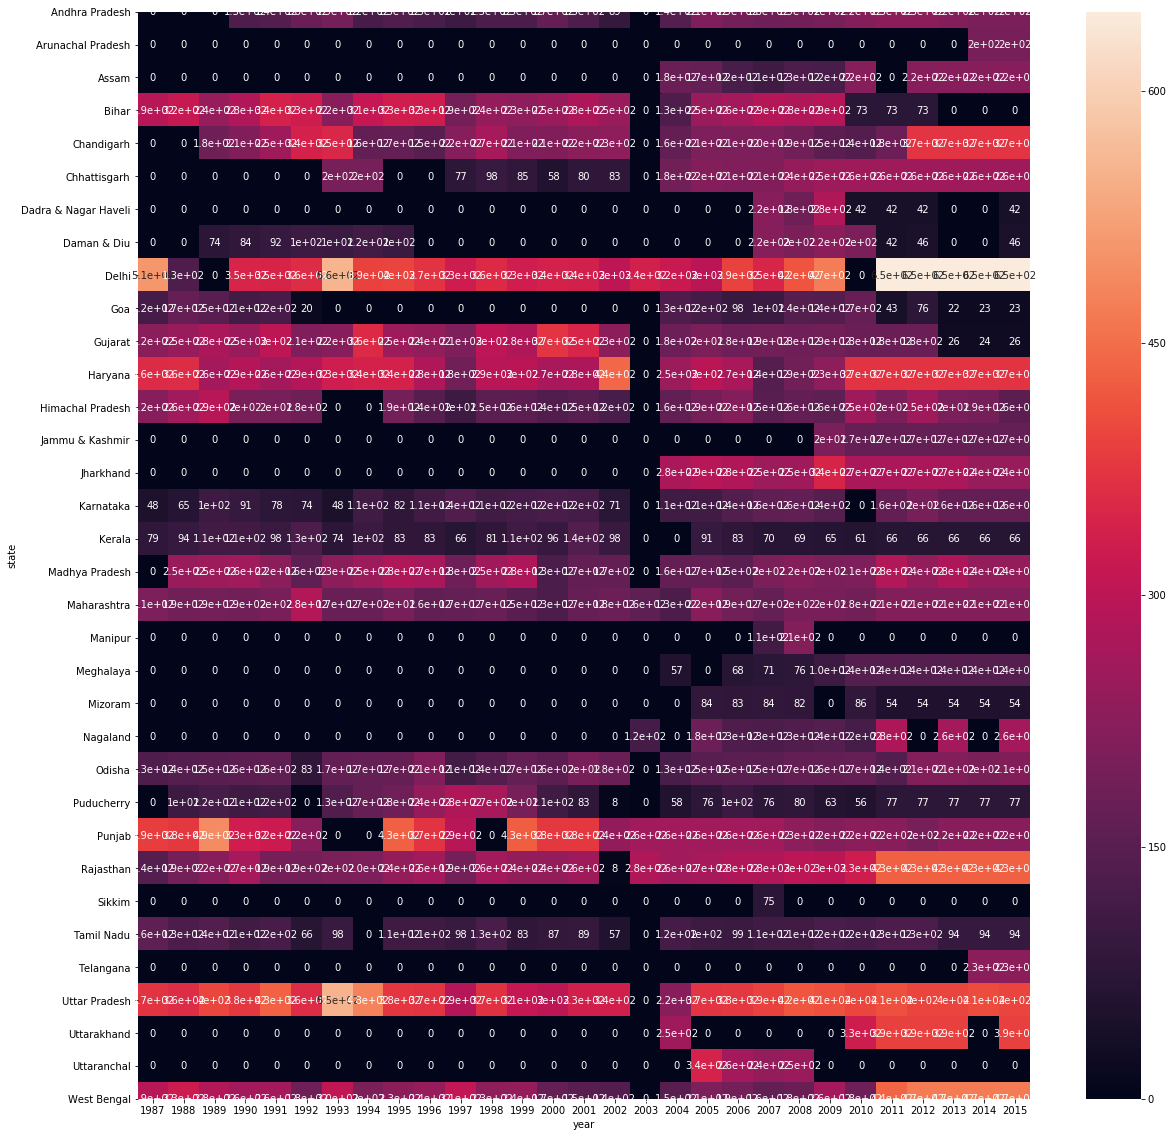

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(data=pivot,annot=True)

The 0 value represents for that year there is missing spm value/no spm values are recorded for that year.


# So2 and No2 levels in bangalore over the years

In [36]:
#Finding the null values for so2 and no2 for karnataka state and the replacing them with median values.
#1)SO2
karnataka=abc.groupby(['state','type'])
a=dict(list(karnataka))
kar_ind=a[('Karnataka','Industrial')]
print(kar_ind['so2'].isnull().sum())
kar_res=a[('Karnataka','Residential')]
print(kar_res['so2'].isnull().sum())
kar_sensitive=a[('Karnataka','Sensitive')]
print(kar_sensitive['so2'].isnull().sum())
# Karnataka has no RIRUO
# kar_riruo=a[('Karnataka','RIRUO')]
# kar_riruo['so2'].isnull().sum()

584
315
68


In [37]:
#now replacing all these null values of So2  with median values  in copy_abc data frame
copy_abc=abc.copy()


In [38]:
copy_abc.loc[(copy_abc['state']=='Karnataka') & (copy_abc['type']=='Industrial') & (copy_abc['so2'].isnull()),'so2']=kar_ind.median()['so2']
copy_abc.loc[(copy_abc['state']=='Karnataka') & (copy_abc['type']=='Residential') & (copy_abc['so2'].isnull()),'so2']=kar_res.median()['so2']
copy_abc.loc[(copy_abc['state']=='Karnataka') & (copy_abc['type']=='Sensitive') & (copy_abc['so2'].isnull()),'so2']=kar_sensitive.median()['so2']


In [39]:
# Checking if null values are imputed S02 
karnataka=copy_abc.groupby(['state','type'])
a=dict(list(karnataka))
print(a[('Karnataka','Industrial')]['so2'].isnull().sum())
print(a[('Karnataka','Residential')]['so2'].isnull().sum())
print(a[('Karnataka','Sensitive')]['so2'].isnull().sum())

0
0
0


In [40]:
#2)Replacing below null values for no2 state of karnataka with median in copy_abc
#No2

In [41]:
kar_ind=a[('Karnataka','Industrial')]
kar_ind['no2'].isnull().sum()
kar_ind=a[('Karnataka','Residential')]
kar_ind['no2'].isnull().sum()
kar_sensitive=a[('Karnataka','Sensitive')]
kar_sensitive['no2'].isnull().sum()
# Karnataka has no RIRUO
# kar_riruo=a[('Karnataka','RIRUO')]
# kar_riruo['no2'].isnull().sum()

45

In [42]:
copy_abc.loc[(copy_abc['state']=='Karnataka') & (copy_abc['type']=='Industrial') & (copy_abc['no2'].isnull()),'no2']=kar_ind.median()['no2']
copy_abc.loc[(copy_abc['state']=='Karnataka') & (copy_abc['type']=='Residential') & (copy_abc['no2'].isnull()),'no2']=kar_res.median()['no2']
copy_abc.loc[(copy_abc['state']=='Karnataka') & (copy_abc['type']=='Sensitive') & (copy_abc['no2'].isnull()),'no2']=kar_sensitive.median()['no2']


In [43]:
# Checking if null values are imputed No2
karnataka=copy_abc.groupby(['state','type'])
a=dict(list(karnataka))
print(a[('Karnataka','Industrial')]['no2'].isnull().sum())
print(a[('Karnataka','Residential')]['no2'].isnull().sum())
print(a[('Karnataka','Sensitive')]['no2'].isnull().sum())

0
0
0


In [44]:
#Now we are grouping the data by just Bangalore state as we have to draw graph of no2 and so2
bangalore=copy_abc.groupby('location')
bangalore=dict(list(bangalore))
bangalore=bangalore['Bangalore'][['so2','no2','date']]
bangalore['year']=bangalore['date'].dt.year
bangalore=bangalore[['so2','no2','year']]
bangalore['year'].isnull().sum()

1

In [45]:
#as we have one null value for year field we have to do forward fill or backward fill.Performing 1st backward fill
bangalore['year']=bangalore['year'].fillna(method='bfill')
bangalore['year']=bangalore['year'].astype('int')
bangalore['year'].isnull().sum()

0

In [46]:
bangalore=bangalore.groupby('year').median()
bangalore=bangalore.reset_index()
bangalore

,year,so2,no2
0,1988,24.700000,13.35
1,1989,21.900000,11.50
2,1990,17.800000,11.00
3,1991,16.300000,10.15
4,1992,8.850000,20.00
5,1995,10.700000,20.00
6,1996,20.800000,23.15
7,1997,27.200000,18.35
8,1998,36.500000,23.40
9,1999,36.000000,24.90


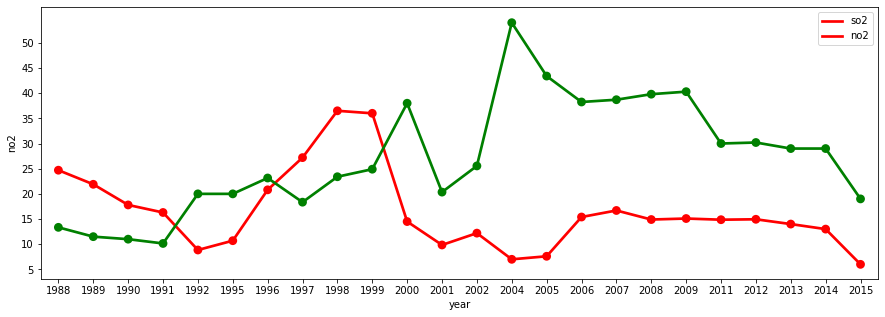

In [56]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
plt.yticks(np.arange(5,55,5))
sns.pointplot(bangalore['year'],bangalore['so2'],color='r')
sns.pointplot(bangalore['year'],bangalore['no2'],color='g')
plt.legend(['so2','no2'])

The above graph shows the level of so2 and no2 level for Bangalore state from year 1987 10 2015.
Amount of So2 in Bangalore city from the year 1988 to 2015:
    In the year 1988 to 1992 the amount of So2 in the air had gradually decreased. 
    The amount of so2 gradually increased from the year 1995 to 1998.
    The amount of so2 from the year 2000 has never increased beyond 25.
    The highest amount of So2 is for the year 1998 and 1999.
Amount of No2 in bangaolre city from the year 1988 to 2015:
    The amount of no2 is gradually increasing till the year 2000.
    The year 2004 marks the highest amount of no2 level whereas after 2004 the amount of no2 is gradually decreasing
    
    